1. Feature Selection with F-Value -> Sort Columns 
2. Fit KNN and Predict with Train Validate Data Split 


In [1]:
import re
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
data_path_raw = Path.cwd().parent.parent / "data" / "raw"

data_path_preprocessed = Path.cwd().parent.parent / "data" / "processed"


In [3]:
raw_df_processed = pd.read_csv(data_path_preprocessed / "training_set_features_encoded_imputed_standardized.csv", index_col="respondent_id")
labels_df = pd.read_csv(data_path_raw / "training_set_labels.csv", index_col="respondent_id")
test_df_processed = pd.read_csv(data_path_preprocessed / "test_set_features_encoded_imputed_standardized.csv", index_col="respondent_id")

all_raw_df = raw_df_processed.join(labels_df)

In [4]:
#1 Feature Selection with F-Value -> Sort Columns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
SelectBest = SelectKBest(score_func=f_classif, k=4)
bestfeatures_h1n1 = SelectBest.fit(raw_df_processed,labels_df['h1n1_vaccine'])

# summarize scores

pd.set_option("display.max_rows", 80) 
bestfeatures_h1n1_df = pd.DataFrame(bestfeatures_h1n1.scores_, index = raw_df_processed.columns.tolist())
bestfeatures_h1n1_df.columns = ['h1n1_scores']
bestfeatures_h1n1_df.sort_values(ascending = False, by = 'h1n1_scores')

#features = fit.transform(X)
# summarize selected features
#features

bestfeatures_seasonal = SelectBest.fit(raw_df_processed,labels_df['seasonal_vaccine'])
# summarize scores

pd.set_option("display.max_rows", 80) 
bestfeatures_seasonal_df = pd.DataFrame(bestfeatures_seasonal.scores_, index = raw_df_processed.columns.tolist())

bestfeatures_seasonal_df.columns = ['seasonal_scores']
bestfeatutures_df = bestfeatures_h1n1_df.join(bestfeatures_seasonal_df)
bestfeatutures_df['combined_scores'] = bestfeatutures_df['h1n1_scores'] + bestfeatutures_df['seasonal_scores']

bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')
#features = fit.transform(X)
# summarize selected features
#features

/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [29 31 48 51] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [29 31 48 51] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,h1n1_scores,seasonal_scores,combined_scores
opinion_seas_risk,1875.881784,4687.262290,6563.144074
doctor_recc_h1n1,4637.592333,1007.057887,5644.650221
doctor_recc_seasonal,1170.871533,3834.992552,5005.864085
opinion_seas_vacc_effective,871.637106,3945.960053,4817.597159
opinion_h1n1_risk,3064.265541,1295.316883,4359.582424
opinion_h1n1_vacc_effective,2058.043383,1154.890863,3212.934247
age_group,45.128890,2227.227052,2272.355942
employment_occupation_WOE,797.637296,960.551315,1758.188611
health_worker,770.772913,426.806927,1197.579839
h1n1_concern,401.784811,653.574278,1055.359089


In [5]:
# get features which maxize roc_auc_score


In [6]:
from sklearn.neighbors import KNeighborsClassifier
import time 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


bestfeatures_df = bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')
bestfeatures_list = bestfeatures_df.index.tolist()



In [7]:
testfeatures_list = []

ROC_Features_3nn = pd.DataFrame(columns = ['last_feature', 'time', 'ROC'])

#for column in bestfeatures_list: 
    testfeatures_list.append(column)
    
    raw_df_testing = raw_df_processed[testfeatures_list]

    
    X_train, X_test, y_train, y_test = train_test_split(
        raw_df_testing,
        labels_df,
        shuffle = True,
        test_size = 0.25,
        random_state = 10)
    
    knn = KNeighborsClassifier(n_neighbors=3)

    start = time.time()
    knn.fit(X_train, y_train)
    test_predictions = knn.predict(X_test)
    test_probability = knn.predict_proba(X_test)
    end = time.time()
    
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = y_test.index
    )
    
    
    ROC_Features_3nn = ROC_Features_3nn.append({'last_feature': column, 'time': end - start, 'ROC': roc_auc_score(y_test, y_preds)}, ignore_index=True)
    

In [8]:
print(ROC_Features_3nn)

                            last_feature       time       ROC
0                      opinion_seas_risk   0.852172  0.575327
1                       doctor_recc_h1n1   0.768008  0.677854
2                   doctor_recc_seasonal   0.776816  0.739401
3            opinion_seas_vacc_effective   0.592537  0.712495
4                      opinion_h1n1_risk   0.588771  0.725481
5            opinion_h1n1_vacc_effective   0.622524  0.737923
6                              age_group   0.645984  0.749271
7              employment_occupation_WOE   0.813026  0.753697
8                          health_worker   1.079503  0.751765
9                           h1n1_concern   1.393919  0.759419
10                 chronic_med_condition   1.645892  0.755804
11          employment_industry_fcxhlnwr   1.966977  0.756561
12                      health_insurance   2.358616  0.764674
13                        h1n1_knowledge   3.616106  0.762673
14  employment_status_Not in Labor Force   3.646258  0.765755
15      

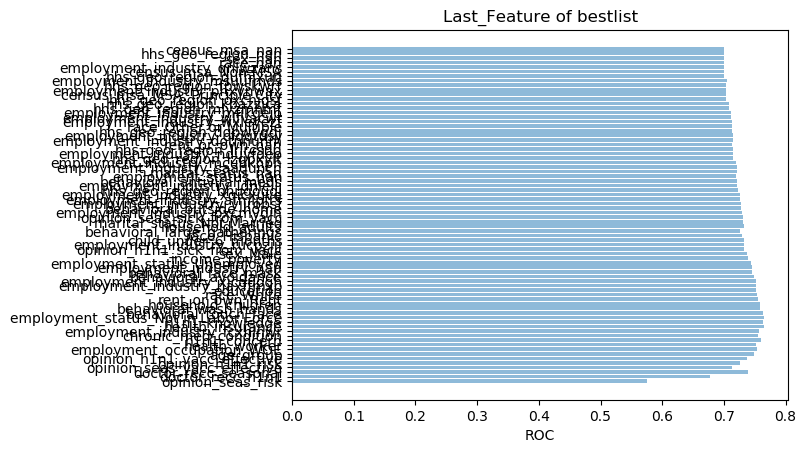

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ROC_Features_3nn['last_feature']
y_pos = np.arange(len(ROC_Features_3nn['last_feature']))
performance = ROC_Features_3nn['ROC']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ROC')
plt.title('Last_Feature of bestlist')

plt.show()

In [10]:
testfeatures_list = []

ROC_Features_5nn = pd.DataFrame(columns = ['last_feature', 'time', 'ROC'])

#for column in bestfeatures_list: 
    testfeatures_list.append(column)
    
    raw_df_testing = raw_df_processed[testfeatures_list]

    
    X_train, X_test, y_train, y_test = train_test_split(
        raw_df_testing,
        labels_df,
        shuffle = True,
        test_size = 0.25,
        random_state = 10)
    
    knn = KNeighborsClassifier(n_neighbors=5)

    start = time.time()
    knn.fit(X_train, y_train)
    test_predictions = knn.predict(X_test)
    test_probability = knn.predict_proba(X_test)
    end = time.time()
    
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = y_test.index
    )
    
    
    ROC_Features_5nn = ROC_Features_5nn.append({'last_feature': column, 'time': end - start, 'ROC': roc_auc_score(y_test, y_preds)}, ignore_index=True)
    

In [11]:
print(ROC_Features_5nn)

                            last_feature       time       ROC
0                      opinion_seas_risk   0.817595  0.635724
1                       doctor_recc_h1n1   0.708402  0.723587
2                   doctor_recc_seasonal   0.776934  0.742752
3            opinion_seas_vacc_effective   0.630478  0.743923
4                      opinion_h1n1_risk   0.648085  0.755862
5            opinion_h1n1_vacc_effective   0.691976  0.758704
6                              age_group   0.735184  0.777249
7              employment_occupation_WOE   0.967527  0.785519
8                          health_worker   1.299717  0.784630
9                           h1n1_concern   1.545219  0.786907
10                 chronic_med_condition   1.921303  0.782738
11          employment_industry_fcxhlnwr   2.253086  0.783708
12                      health_insurance   2.809584  0.791684
13                        h1n1_knowledge   3.349036  0.790484
14  employment_status_Not in Labor Force   4.046096  0.793573
15      

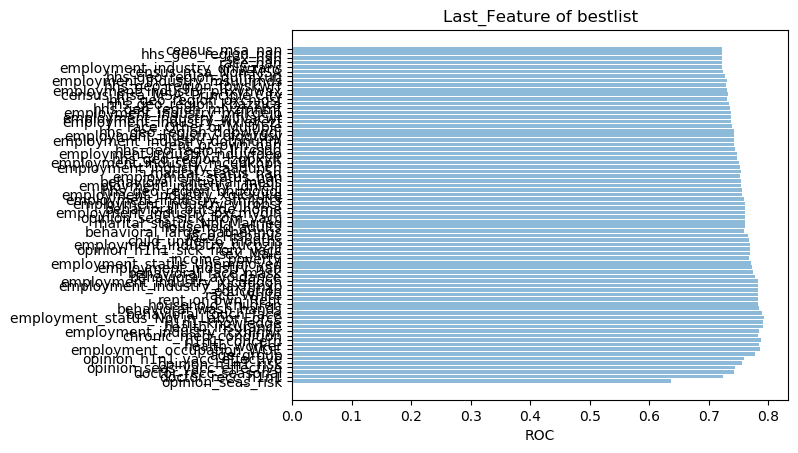

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ROC_Features_5nn['last_feature']
y_pos = np.arange(len(ROC_Features_5nn['last_feature']))
performance = ROC_Features_5nn['ROC']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ROC')
plt.title('Last_Feature of bestlist')

plt.show()

In [13]:
testfeatures_list = []

ROC_Features_7nn = pd.DataFrame(columns = ['last_feature', 'time', 'ROC'])

#for column in bestfeatures_list: 
    testfeatures_list.append(column)
    
    raw_df_testing = raw_df_processed[testfeatures_list]

    
    X_train, X_test, y_train, y_test = train_test_split(
        raw_df_testing,
        labels_df,
        shuffle = True,
        test_size = 0.25,
        random_state = 10)
    
    knn = KNeighborsClassifier(n_neighbors=7)

    start = time.time()
    knn.fit(X_train, y_train)
    test_predictions = knn.predict(X_test)
    test_probability = knn.predict_proba(X_test)
    end = time.time()
    
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = y_test.index
    )
    
    
    ROC_Features_7nn = ROC_Features_7nn.append({'last_feature': column, 'time': end - start, 'ROC': roc_auc_score(y_test, y_preds)}, ignore_index=True)
    

In [14]:
print(ROC_Features_7nn)

                            last_feature       time       ROC
0                      opinion_seas_risk   0.900917  0.661514
1                       doctor_recc_h1n1   0.881981  0.739690
2                   doctor_recc_seasonal   0.855593  0.749466
3            opinion_seas_vacc_effective   0.782833  0.752886
4                      opinion_h1n1_risk   0.727587  0.762855
5            opinion_h1n1_vacc_effective   0.755403  0.773748
6                              age_group   0.775981  0.789266
7              employment_occupation_WOE   1.100354  0.801813
8                          health_worker   1.409203  0.802093
9                           h1n1_concern   1.677085  0.800486
10                 chronic_med_condition   2.109327  0.798094
11          employment_industry_fcxhlnwr   2.743300  0.798430
12                      health_insurance   3.316709  0.804965
13                        h1n1_knowledge   4.165634  0.805966
14  employment_status_Not in Labor Force   4.710183  0.807259
15      

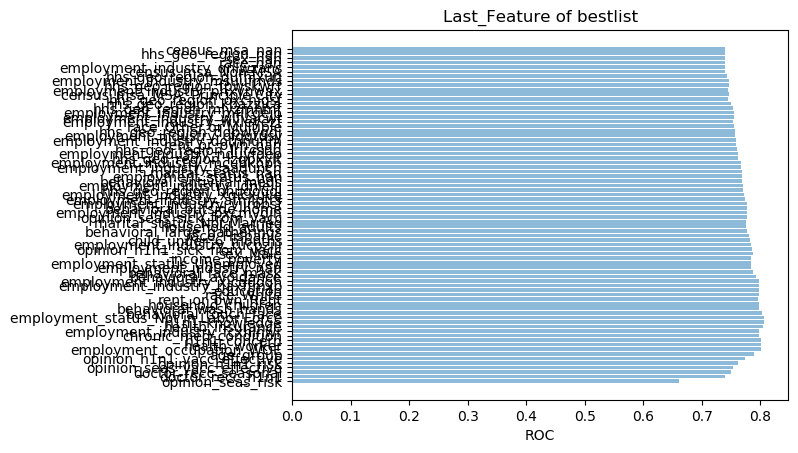

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ROC_Features_7nn['last_feature']
y_pos = np.arange(len(ROC_Features_7nn['last_feature']))
performance = ROC_Features_7nn['ROC']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ROC')
plt.title('Last_Feature of bestlist')

plt.show()